# Análise dias típicos Osório 2019 - Dados brutos
Clusterização de timeseries.

## Preparando o ambiente

In [1]:
!pip uninstall scikit-learn -y
!pip install -U scikit-learn
!pip install tslearn

Uninstalling scikit-learn-0.24.2:
  Successfully uninstalled scikit-learn-0.24.2
  Using cached https://files.pythonhosted.org/packages/a8/eb/a48f25c967526b66d5f1fa7a984594f0bf0a5afafa94a8c4dbc317744620/scikit_learn-0.24.2-cp37-cp37m-manylinux2010_x86_64.whl


In [40]:
from tslearn.clustering import TimeSeriesKMeans, silhouette_score
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import sklearn.metrics as skmetrics

## Carregando os dados

In [26]:
osorio = pd.read_csv('https://raw.githubusercontent.com/SalatielBairros/dias-tipicos/main/data/osorio_2019.csv')

In [27]:
osorio.sample(5)

,Unnamed: 0,local_time,irradiance_direct,irradiance_diffuse,temperature,wind_speed
1545,1545,2019-03-06 06:00:00,0.000,0.015,23.317,2.221
914,914,2019-02-08 00:00:00,0.000,0.000,22.186,2.610
727,727,2019-01-31 05:00:00,0.000,0.000,26.072,1.378
3194,3194,2019-05-13 23:00:00,0.000,0.000,18.679,2.141
7283,7283,2019-10-31 08:00:00,0.004,0.130,21.014,4.391


In [28]:
del osorio['Unnamed: 0']

In [29]:
X = osorio.drop(columns=['local_time'])
X.sample(5)

,irradiance_direct,irradiance_diffuse,temperature,wind_speed
755,0.274,0.166,27.085,1.595
4364,0.006,0.007,12.208,2.980
5968,0.063,0.312,16.754,5.633
6782,0.918,0.106,25.120,1.357
3555,0.000,0.000,16.262,1.933


In [30]:
range_clusters = range(2, 11)
range_clusters

range(2, 11)

In [31]:
seed = 50
np.random.seed(seed)

In [33]:
X_train = X[0::3]

In [34]:
X_train

,irradiance_direct,irradiance_diffuse,temperature,wind_speed
0,0.000,0.000,24.202,2.675
3,0.000,0.000,23.679,2.874
6,0.000,0.000,23.489,2.998
9,0.000,0.091,24.256,3.748
12,0.304,0.255,27.130,3.894
...,...,...,...,...
8745,0.000,0.094,23.631,3.145
8748,0.557,0.144,28.709,1.769
8751,0.382,0.355,30.889,1.820
8754,0.050,0.293,29.550,2.659


In [36]:
#for n in range_clusters:
#  km = TimeSeriesKMeans(n_clusters=n, max_iter=100, n_init=5, metric="dtw")
#  labels = km.fit_predict(X_train)
#  print(silhouette_score(X_train, labels, metric="euclidean"))

0.48693309744735647
0.42447932048153847
0.4109680537139251
0.3736485195402149


KeyboardInterrupt: ignored

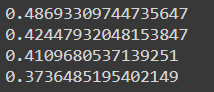

O [`DTW`](https://en.wikipedia.org/wiki/Dynamic_time_warping) leva muito tempo para calcular o `silhouette_score`.

## Agrupando os dados brutos

Agrupando os dados brutos com KMenas tradicional sem redução nos dados.

In [43]:
for n in range_clusters:
  km = KMeans(n_clusters=n)
  labels = km.fit_predict(X)
  print((n, skmetrics.silhouette_score(X, labels)))

(2, 0.4861528872227653)
(3, 0.4271421626237035)
(4, 0.4109942945974519)
(5, 0.3707055215097429)
(6, 0.33690763679260655)
(7, 0.3434444996017783)
(8, 0.3369499135434381)
(9, 0.3346340301879795)
(10, 0.33207876745571036)


In [47]:
km = KMeans(n_clusters=2)
labels = km.fit_predict(X_train)
print(np.unique(labels, return_counts=True))
pd.DataFrame(data=km.cluster_centers_, columns=X.columns)

(array([0, 1], dtype=int32), array([1665, 1255]))


,irradiance_direct,irradiance_diffuse,temperature,wind_speed
0,0.204357,0.096517,23.034102,2.968263
1,0.079639,0.035710,15.457484,2.943264


Os dois clusters criados estão, provavelmente, dividindo dia e noite.

### Removendo o `wind_speed` do modelo

In [48]:
X = osorio.drop(columns=['local_time', 'wind_speed'])
X.sample(5)

,irradiance_direct,irradiance_diffuse,temperature
2481,0.001,0.003,21.428
3569,0.272,0.172,19.130
177,0.000,0.096,24.438
6959,0.000,0.000,20.531
5068,0.000,0.000,12.678


Rodando o `TimeSeriesKMeans` com os dados reduzidos (1 a cada 3 horas obtidas). E utilizando uma distância diferente para o coeficiente de silhueta.

In [50]:
X_train = X[0::3]

In [51]:
#for n in range_clusters:
#  km = TimeSeriesKMeans(n_clusters=n, max_iter=100, n_init=5, metric="dtw")
#  labels = km.fit_predict(X_train)
#  print((n, silhouette_score(X_train, labels, metric="euclidean")))

(2, 0.5483925464593212)
(3, 0.5118649073465417)
(4, 0.5233409760027495)
(5, 0.5154717137671124)
(6, 0.5046977688260261)


KeyboardInterrupt: ignored

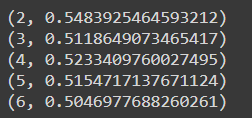

In [52]:
for n in range_clusters:
  km = KMeans(n_clusters=n)
  labels = km.fit_predict(X)
  print((n, skmetrics.silhouette_score(X, labels)))

(2, 0.5478814047851956)
(3, 0.5144804166741466)
(4, 0.5242419319137951)
(5, 0.5111672063986994)
(6, 0.5020389667010345)
(7, 0.5030848079955922)
(8, 0.48998264779925277)
(9, 0.48441922134003773)
(10, 0.48416181903972066)


## Agrupando pelo período do dia (6 às 18)

In [54]:
osorio.sample(5)

,local_time,irradiance_direct,irradiance_diffuse,temperature,wind_speed
8584,2019-12-24 14:00:00,0.865,0.107,26.766,2.660
6668,2019-10-05 17:00:00,0.015,0.094,18.742,4.304
1407,2019-02-28 12:00:00,0.849,0.152,24.354,1.929
736,2019-01-31 14:00:00,0.317,0.371,31.059,2.057
861,2019-02-05 19:00:00,0.000,0.042,22.079,1.845


In [58]:
osorio['local_time'] = pd.to_datetime(osorio['local_time'])

In [77]:
data={
    'irradiance_direct': X['irradiance_direct'].values,
    'irradiance_diffuse': X['irradiance_diffuse'].values,
    'temperature': X['temperature'].values,
}
df = pd.DataFrame(data=data,index = osorio['local_time'])
df.head(5)

,irradiance_direct,irradiance_diffuse,temperature
local_time,,,
2018-12-31 22:00:00,0.0,0.0,24.202
2018-12-31 23:00:00,0.0,0.0,23.979
2019-01-01 00:00:00,0.0,0.0,23.806
2019-01-01 01:00:00,0.0,0.0,23.679
2019-01-01 02:00:00,0.0,0.0,23.633


In [82]:
X = df.between_time('06:00:00', '18:00:00')
X.shape

(4745, 3)

Testando com o `TimeSeriesKMeans`

In [84]:
#X_train = X[0::2]
#for n in range_clusters:
#  km = TimeSeriesKMeans(n_clusters=n, max_iter=100, n_init=5, metric="dtw")
#  labels = km.fit_predict(X_train)
#  print((n, silhouette_score(X_train, labels, metric="euclidean")))

(2, 0.5524690901810466)
(3, 0.5142839539341076)
(4, 0.5285594967715744)


KeyboardInterrupt: ignored

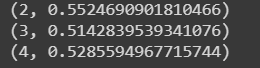

Testando com o `KMeans`

In [87]:
range_clusters = range(2, 30)
for n in range_clusters:
  km = KMeans(n_clusters=n)
  labels = km.fit_predict(X)
  print((n, skmetrics.silhouette_score(X, labels), np.unique(labels, return_counts=True)))

(2, 0.5532250144239729, (array([0, 1], dtype=int32), array([2841, 1904])))
(3, 0.5144060566896724, (array([0, 1, 2], dtype=int32), array([1292, 2273, 1180])))
(4, 0.5303949573646346, (array([0, 1, 2, 3], dtype=int32), array([1387, 1890,  488,  980])))
(5, 0.5010075764021049, (array([0, 1, 2, 3, 4], dtype=int32), array([1366, 1058,  662,  402, 1257])))
(6, 0.4944210958237017, (array([0, 1, 2, 3, 4, 5], dtype=int32), array([ 867,  779, 1003,  324,  451, 1321])))
(7, 0.4898262397190064, (array([0, 1, 2, 3, 4, 5, 6], dtype=int32), array([ 235, 1120,  821,  407,  769,  943,  450])))
(8, 0.4785361673551315, (array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32), array([967, 643, 320, 352, 888, 744, 172, 659])))
(9, 0.4654600087974682, (array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32), array([159, 812, 639, 502, 941, 285, 671, 292, 444])))
(10, 0.4564038140280599, (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32), array([779, 246, 281, 575, 583, 424, 142, 742, 390, 583])))
(11, 0.44726607565035537, (

### Exibindo os melhores grupos encontrados

In [86]:
km = KMeans(n_clusters=2)
labels = km.fit_predict(X_train)
print(np.unique(labels, return_counts=True))
pd.DataFrame(data=km.cluster_centers_, columns=X.columns)

(array([0, 1], dtype=int32), array([1433,  940]))


,irradiance_direct,irradiance_diffuse,temperature
0,0.336456,0.156853,24.026788
1,0.193038,0.089210,16.293569


In [88]:
km = KMeans(n_clusters=4)
labels = km.fit_predict(X_train)
print(np.unique(labels, return_counts=True))
pd.DataFrame(data=km.cluster_centers_, columns=X.columns)

(array([0, 1, 2, 3], dtype=int32), array([955, 687, 492, 239]))


,irradiance_direct,irradiance_diffuse,temperature
0,0.299391,0.140228,22.334135
1,0.185115,0.096616,17.742239
2,0.401871,0.187604,27.220594
3,0.221711,0.067485,11.906134


## Salvando o dataset

In [90]:
X.shape

(4745, 3)

In [91]:
X.to_csv('pv_dia_osorio_2019.csv')